### Loading required packages

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras


In [2]:
import matplotlib.pyplot as plt

### Loading data

In [3]:
mnist= keras.datasets.mnist.load_data()

In [4]:
type(mnist)

tuple

In [5]:
(X_train, y_train), (X_test, y_test) = mnist

In [6]:
# scaled the training set
X_train_scaled = X_train/255
X_test_scaled = X_test/255

### Image view

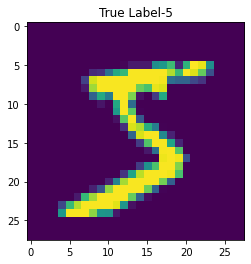

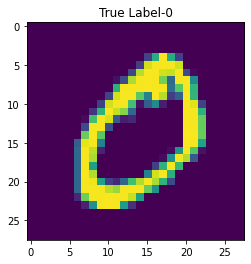

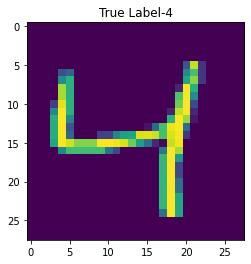

In [7]:
def show_image(indexs):
    for index in list(indexs):
        plt.imshow(X_train[index].reshape(28,28))
        plt.title(f"True Label-{y_train[index]}")
        plt.show()
    
show_image((0,1,2))

### Ceating neural network

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
# NN with 10 neurin in output kayer

nn_dense = keras.Sequential([
    keras.layers.Dense(10, input_shape= (784,), activation= 'sigmoid')
])

nn_dense.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']    
)

# as it has 784 input shape so flatting thw feature/input
X_train_flat = X_train_scaled.reshape(len(X_train), 28*28)
X_test_flat = X_test_scaled.reshape(len(X_test), 28*28)

nn_dense.fit(X_train_flat, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4866 - accuracy: 0.8779
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3063 - accuracy: 0.9163
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2859 - accuracy: 0.9205
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2750 - accuracy: 0.9237
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2678 - accuracy: 0.9269


In [10]:
# evaluating NN on test set

nn_dense.evaluate(X_test_flat, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2674387117773294, 0.9247]

6


Text(0.5, 1.0, 'predicted digit- 6\nTrue digit- 6')

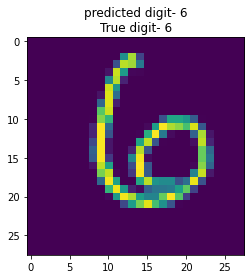

In [11]:
# sample prediction, view
# pass index of test sample which need to be predicted

def predict_digit(index):
    return np.argmax(nn_dense.predict(X_test_flat[index].reshape(1,-1)))

index = 100
prdicted_digit= predict_digit(index)
print(prdicted_digit)
plt.imshow(X_test[index])
plt.title(f"predicted digit- {prdicted_digit}\nTrue digit- {y_test[index]}")


In [12]:
y_pred = nn_dense.predict(X_test_flat)
y_pred

array([[1.89542770e-05, 0.00000000e+00, 4.58657742e-05, ...,
        7.78402209e-01, 6.25848770e-05, 6.04897738e-04],
       [4.33176756e-04, 8.34465027e-07, 4.90486145e-01, ...,
        0.00000000e+00, 5.23924828e-05, 0.00000000e+00],
       [1.51991844e-06, 4.53506261e-01, 9.82084870e-03, ...,
        9.23693180e-04, 2.35509872e-03, 2.00241804e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.54647636e-06, 1.40964985e-05, 3.41832638e-05],
       [0.00000000e+00, 0.00000000e+00, 2.98023224e-08, ...,
        0.00000000e+00, 3.00526619e-04, 0.00000000e+00],
       [1.49011612e-07, 0.00000000e+00, 2.68220901e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)

In [13]:
y_pred_labels= [np.argmax(pred) for pred in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

### Confusion Matrics

In [14]:
cm= tf.math.confusion_matrix(labels= y_test, predictions= [np.argmax(pred) for pred in y_pred])
cm

<tf.Tensor: id=30242, shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   5,    6,  932,   19,    8,    2,   12,   10,   36,    2],
       [   2,    0,   21,  937,    0,   11,    2,   11,   20,    6],
       [   1,    1,    6,    2,  918,    0,   10,    4,   11,   29],
       [  10,    1,    4,   53,   11,  752,   14,    7,   35,    5],
       [  14,    3,    6,    1,    7,   11,  911,    2,    3,    0],
       [   1,    5,   22,    9,    8,    0,    0,  954,    3,   26],
       [   9,    7,    7,   27,    9,   18,    9,   13,  870,    5],
       [  10,    7,    1,   13,   34,    6,    0,   30,   11,  897]])>

##### confusion matrics visualization


Text(69.0, 0.5, 'True')

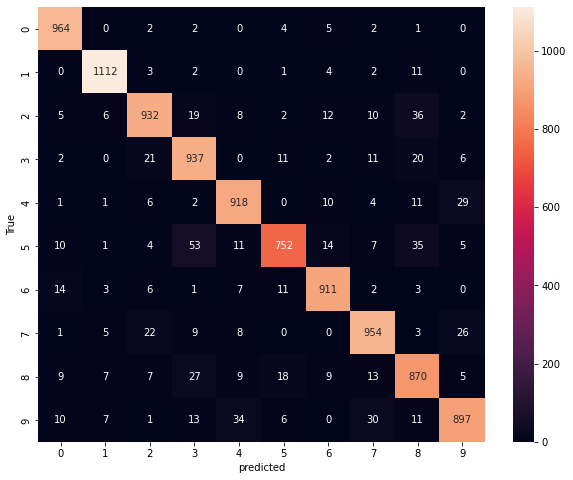

In [15]:
import seaborn as sn
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("True")

In [37]:
# Creating NN with some hidden Layear with flatten input layer 

nn_dense2= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation= "relu"),
    keras.layers.Dense(50, activation= 'relu'),
    keras.layers.Dense(10, activation= "sigmoid")
])

nn_dense2.compile(
    optimizer= "adam",
    loss= "sparse_categorical_crossentropy",
    metrics= ["accuracy"]
)


In [40]:
nn_dense2.fit(X_train_scaled, y_train, epochs= 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0434 - accuracy: 0.9865
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0364 - accuracy: 0.9881
Epoch 3/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0309 - accuracy: 0.9899
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0257 - accuracy: 0.9915
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0221 - accuracy: 0.9929
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0200 - accuracy: 0.9934
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0195 - accuracy: 0.9936
Epoch 8/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0167 - accuracy: 0.9944
Epoch 9/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0157 - accuracy: 0.9947
Epoch 10/10
60

In [41]:
nn_dense2.evaluate(X_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.1075125485870929, 0.9777]

In [42]:
y_pred2= nn_dense2.predict(X_test_scaled)
y_pred2

array([[0.0000000e+00, 0.0000000e+00, 2.9802322e-08, ..., 9.4950306e-01,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 7.5370920e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 8.3768511e-01, 1.3113022e-06, ..., 1.3411045e-06,
        6.7055225e-06, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [43]:
cm2= tf.math.confusion_matrix(labels= y_test, predictions= [np.argmax(pred) for pred in y_pred2])
cm2

<tf.Tensor: id=3164313, shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    2,    0,    0,    1,    1,    1,    2,    2],
       [   1, 1125,    3,    0,    0,    1,    2,    0,    3,    0],
       [   0,    1, 1018,    2,    3,    0,    2,    2,    3,    1],
       [   0,    0,   10,  985,    0,    2,    1,    4,    5,    3],
       [   0,    1,    5,    1,  959,    1,    3,    2,    2,    8],
       [   2,    0,    0,   17,    0,  862,    5,    1,    5,    0],
       [   7,    2,    0,    0,    3,    4,  940,    0,    2,    0],
       [   2,    8,   14,    1,    1,    0,    0,  992,    3,    7],
       [   5,    1,    5,    6,    1,    4,    0,    2,  945,    5],
       [   4,    2,    1,    4,   10,    1,    1,    3,    3,  980]])>

Text(69.0, 0.5, 'Truth')

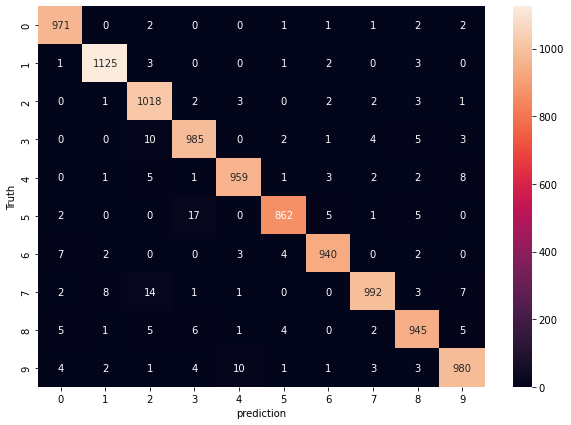

In [44]:
plt.figure(figsize=(10,7))
sn.heatmap(cm2, annot=True, fmt="d"),
plt.xlabel("prediction")
plt.ylabel("Truth")